# Logistic 回归

## 问题设定

考虑一个二分类问题，对于数据集$X, Y$，$X$是一个维度为$(-1, 2)$的数组，$Y$是标签，其值为$0 , 1$，我们首先生成数据集并绘制出他们的图像：

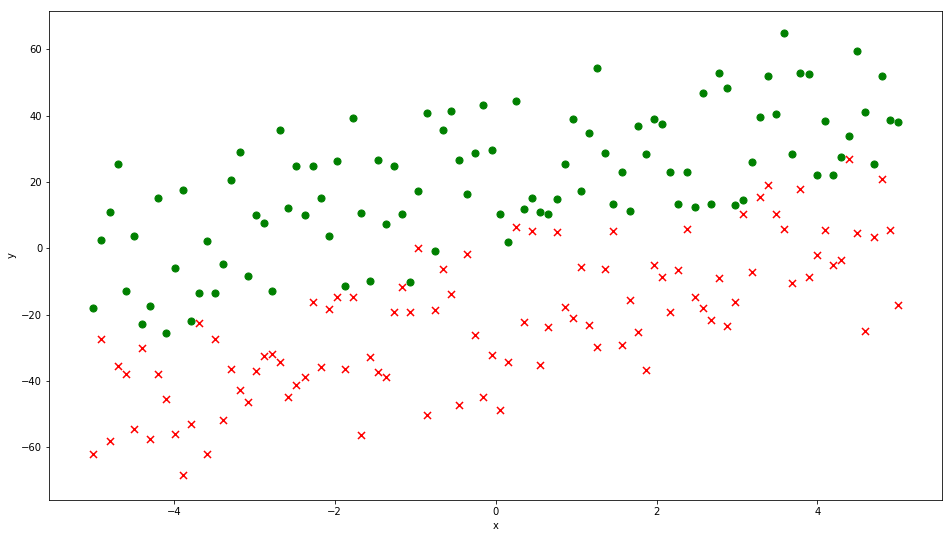

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

data_count = 100

x1_points = np.linspace(-5, 5, data_count).reshape((-1, 1))
x2_points = np.multiply(5, x1_points) + np.random.randint(-5, 50, size=(data_count,)).reshape((-1, 1))

x_positive_data = np.concatenate((x1_points, x2_points), axis=1)
y_positive_data = np.array([1] * data_count)

x1_points = np.linspace(-5, 5, data_count).reshape((-1, 1))
x2_points = np.multiply(5, x1_points) - np.random.randint(-5, 50, size=(data_count,)).reshape((-1, 1))

x_negative_data = np.concatenate((x1_points, x2_points), axis=1)
y_negative_data = np.array([0] * data_count)

x_data = np.concatenate((x_positive_data, x_negative_data))
y_data = np.concatenate((y_positive_data, y_negative_data))

plt.figure(figsize=(16, 9))
plt.scatter(x_data[:data_count, 0], x_data[:data_count, 1], s=50, color='g', marker='o')
plt.scatter(x_data[data_count:, 0], x_data[data_count:, 1], s=50, color='r', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

我们希望找到一个函数：

$$
h(x_1, x_2) = sigmoid(w_1x_1 + w_2x_2)
$$

## 交叉熵损失函数

这个函数对于每一组$x_1, x_2$，会判断它属于绿点的概率，而1减去这个概率就是它属于红叉的概率。为了做到这一点，我们可以写出交叉熵损失函数：

$$
CrossEntropy(w_1,w_2) = -\frac{1}{N} \sum^{N}_{i=0} \left( y_i \cdot \ln ( h(x^1_i, x^2_i) ) + (1 - y_i) \cdot ln(1 - h(x^1_i, x^2_i)\right)
$$

我们希望找到一组$w_1, w_2$，是的交叉熵最小，我们首先初始化一组$w_1, w_2$，并绘制出它的图像：

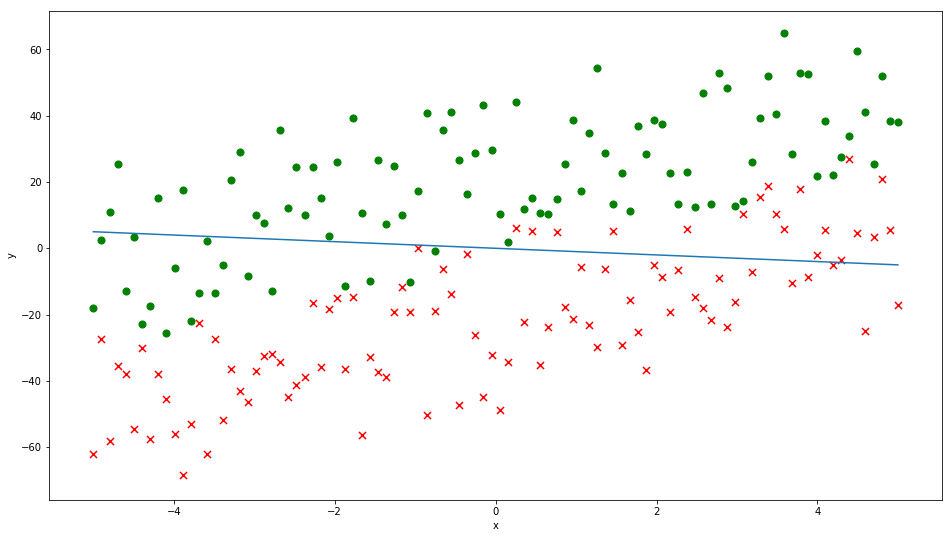

In [2]:
w = np.array([7.5, 7.5])

y = - np.multiply(x_data[: data_count, 0], w[0]) / w[1]

plt.figure(figsize=(16, 9))
plt.plot(x_data[: data_count, 0], y)
plt.scatter(x_data[:data_count, 0], x_data[:data_count, 1], s=50, color='g', marker='o')
plt.scatter(x_data[data_count:, 0], x_data[data_count:, 1], s=50, color='r', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 梯度下降

我们仍然通过梯度下降找到这组$w_1, w_2$，我们仍然先对$w_1, w_2$求偏微分：

$$
\begin{aligned} \frac{\partial loss(w_1, w_2)}{\partial w_1} &= \frac{1}{N}\sum^{N}_{i=0}\left(\frac{y_i}{h(x^1_i, x^2_i)} \cdot sigmoid^{'}(x^1_i, x^2_i) \cdot x_1 + \frac{1-y_i}{1 - h(x^1_i, x^2_i))} \cdot - sigmoid^{'}(x^1_i, x^2_i) \cdot x_1 \right) \\ &= \frac{1}{N}\sum^{N}_{i=0}\left(\frac{y_i}{h(x^1_i, x^2_i)} - \frac{1-y_i}{1 - h(x^1_i, x^2_i)} \right) \cdot sigmoid^{'}(x^1_i, x^2_i) \cdot x_1 \\ &= \frac{1}{N}\sum^{N}_{i=0}\left(\frac{y_i}{h(x^1_i, x^2_i)} - \frac{1-y_i}{1 - h(x^1_i, x^2_i)} \right) \cdot h(x^1_i, x^2_i)(1 - h(x^1_i, x^2_i)) \cdot x_1 \\ & = \frac{1}{N}\sum^{N}_{i=0}\left(y_i \cdot (1 - h(x^1_i, x^2_i)) - (1-y_i) \cdot h(x^1_i, x^2_i) \right) \cdot x_1 \\ &= \frac{1}{N}\sum^{N}_{i=0}\left(y_i - y_i \cdot h(x^1_i, x^2_i)) - h(x^1_i, x^2_i) + y_i \cdot h(x^1_i, x^2_i) \right) \cdot x_1 \\ &= \frac{1}{N}\sum^{N}_{i=0}\left(y_i - h(x^1_i, x^2_i)) \right) \cdot x_1 \\ \end{aligned}
$$

然后我们依次更新$w_1, w_2$：

$$
\begin{aligned} w^1_{t+1} &= w^1_t - \eta \frac{\partial l(w^1_t, w^2_t)}{\partial w^1_t} \\ w^2_{t+1} &= w^2_t - \eta \frac{\partial l(w^1_t, w^2_t)}{\partial w^2_t} \end{aligned}
$$

然后我们迭代3000次，绘制出损失函数的值与最后$w_1, w_2$的方程：

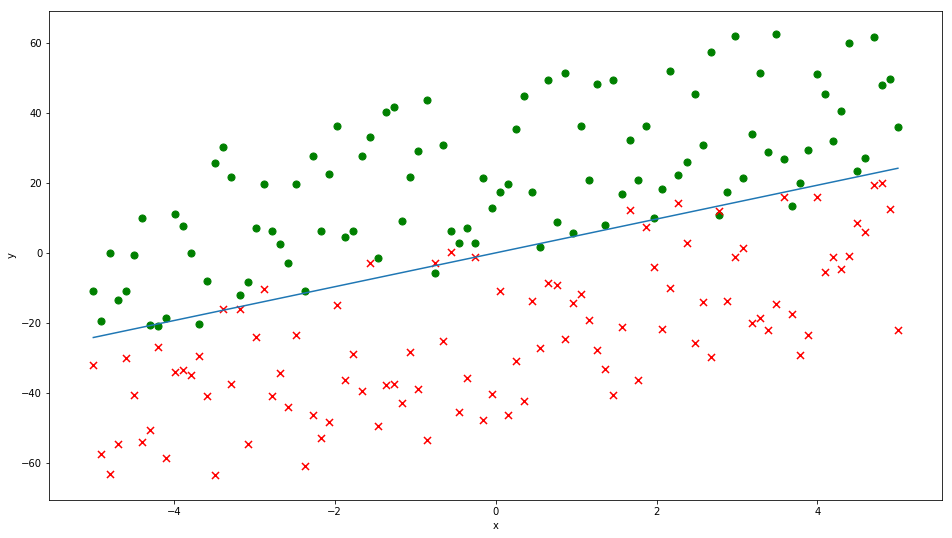

In [12]:
import sys

sys.path.append('../')

from utility import function

sigmoid = np.vectorize(function.sigmoid)
grad_sigmoid = np.vectorize(function.grad_sigmoid)

loss_cache = []

for iteration in range(2000):
    # 计算内积
    y_product = np.dot(x_data, w.T)
    # 计算预测标签值 (200, 2) * (2, 1) -> (200, 1)
    y_positive_predict = sigmoid(y_product)
    y_negative_predict = 1 - y_positive_predict
    y_negative_predict[y_negative_predict < 1e-4] = 1e-4
    # 计算交叉熵
    cross_entropy = -np.mean(y_data * np.log(y_positive_predict) + (1 - y_data) * np.log(y_negative_predict))
    # 计算梯度
    grad_w = -np.mean(y_data / y_positive_predict * grad_sigmoid(y_product) * x_data.T, axis=1)
    # grad_w = -np.mean((y_data - y_positive_predict) * x_data.T, axis=1)
    # 更新梯度
    w = w - 0.03 * grad_w
    # 缓存交叉熵
    loss_cache.append(cross_entropy)

y = - np.multiply(x_data[: data_count, 0], w[0]) / w[1]
    
plt.figure(figsize=(16, 9))
plt.plot(x_data[: data_count, 0], y)
plt.scatter(x_data[:data_count, 0], x_data[:data_count, 1], s=50, color='g', marker='o')
plt.scatter(x_data[data_count:, 0], x_data[data_count:, 1], s=50, color='r', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

损失函数图：

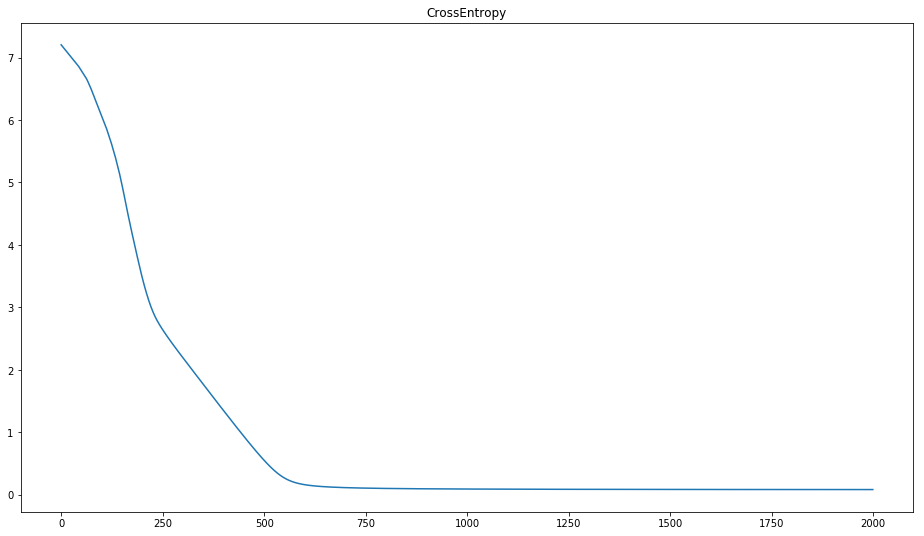

In [16]:
plt.figure(figsize=(16, 9))
plt.title('CrossEntropy')
plt.plot(loss_cache)
plt.show()